## **Practical session (graded session), Computational Imaging**
Objective: implement and evaluate continuous (variational) and discrete (MRF) formulations for image denoising

# Part I: Heat equation
Derive and implement the diffusion equation associated with the minimization of the regularisation energy $\int_\Omega \|\nabla u(p)\|^2dp$.

Load an image using skimage module. Test images are available at: https://homepages.cae.wisc.edu/~ece533/images/

In [15]:
## load an image
import skimage as sk
import numpy as np
import copy
import matplotlib.pyplot as plt
import scipy as sc
from skimage.color import rgb2gray

u = rgb2gray(sk.io.imread('peppers.png'))

Apply a N-step diffusion process to the loaded image based on the heat equation
Code this N-step diffusion process as a callable function using as input parameters, the image u, the numer of iterations N and a scalar parameter $\lambda$

In [16]:
def computeHeatDiffusion(u,N,alpha):
    # initialize uf
    uf = copy.deepcopy(u)
    
    for i in range(N):
        # apply the laplace operator on uf
        laplace_uf = alpha*sc.ndimage.filters.laplace(uf)
        # update the pixel values
        uf = uf + laplace_uf    
    return uf

Visualize the result of the diffusion on an image and highlight through an approriate visualization and/or evaluation metrics the quality of the output image.

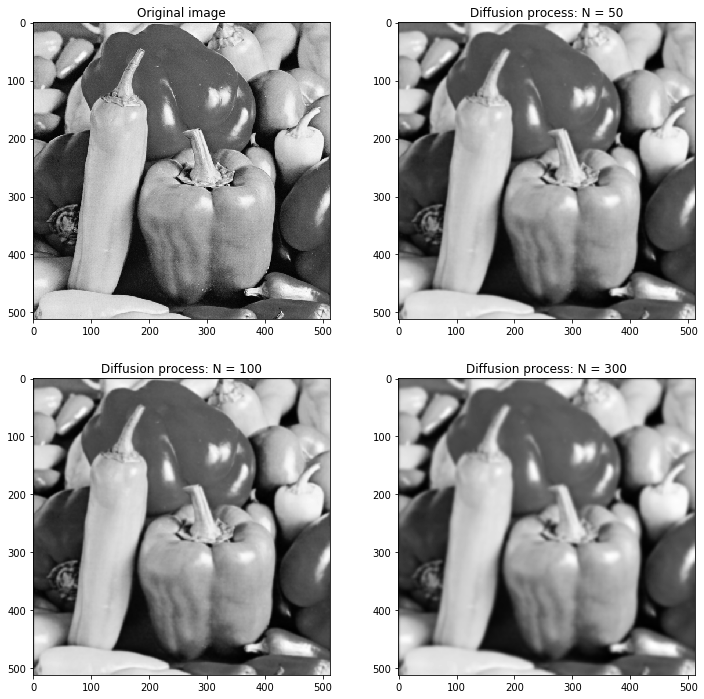

In [17]:
u1_50 = computeHeatDiffusion(u,50,0.01)
u1_100 = computeHeatDiffusion(u,100,0.01)
u1_300 = computeHeatDiffusion(u,300,0.01)
# plot the orignal image
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(u, cmap = 'gray')
plt.title("Original image")
# plot the diffusion on the image
plt.subplot(222)
plt.imshow(u1_100, cmap = 'gray')
plt.title('Diffusion process: N = 50');
plt.subplot(223)
plt.imshow(u1_100, cmap = 'gray')
plt.title('Diffusion process: N = 100');
plt.subplot(224)
plt.imshow(u1_300, cmap = 'gray')
plt.title('Diffusion process: N = 300');

######  Conclusion :
The results are similar to those obtained with an averaging filter because of the invariance of the Laplacian operator with respect to the local frame. When we increase the number of iterations, the edges are more and more blurred.

# Part II: Heat equation for image denoising
Derive and implement the diffusion equation associated with image denoising according to the following cost function $\min_u \int_\Omega \| u(p)-v(p)\|^2dp+\alpha \int_\Omega \|\nabla u(p)\|^2dp$, where $v$ is a noisy image.

Load an image and generate a noisy image using an additive Gaussian noise. You can use function np.random.normal() to generate the noise.

In [18]:
# generate noisy image
mu, sigma = 0, 0.1 # mean and standard deviation
u_noisy = u + np.random.normal(mu,sigma,u.shape[0]*u.shape[1]).reshape(u.shape[0],u.shape[1])

Implement a diffusion equation to solve the above minimization through a function denoisingHeatDiffusion(v,N,alpha) with v the noisy image, N the number of iterations of the diffusion, $\alpha$ the weighing factor of the regularization term and $\lambda$ the gradient step

In [19]:
def denoisingHeatDiffusion(v,N,alpha,lambda_):  
    # initialize a denoised image
    uf  = copy.deepcopy(v)
    
    for i in range(N):
        dudt = 2*lambda_*((v-uf) + alpha*sc.ndimage.filters.laplace(uf))
        uf = uf + dudt
    return uf

Run denoising experiments and evaluate the quality of the denoising process w.r.t. the main parameters of the denoising scheme



**Vary the number of iterations**

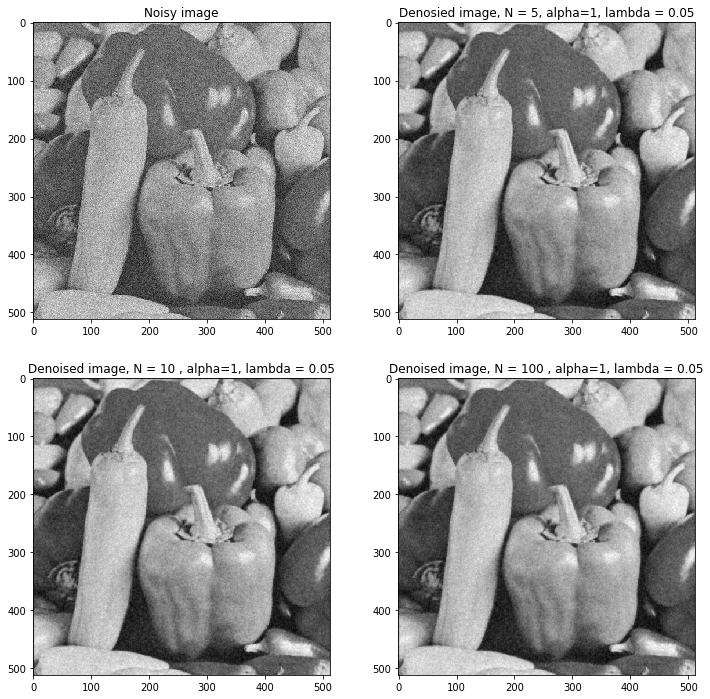

In [20]:
alpha = 1
lambda_ = 0.05
u2_5 = denoisingHeatDiffusion(u_noisy,5,alpha,lambda_)
u2_10 = denoisingHeatDiffusion(u_noisy,10,alpha,lambda_)
u2_100 = denoisingHeatDiffusion(u_noisy,100,alpha,lambda_)
# plot the orignal image
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(u_noisy, cmap = 'gray')
plt.title("Noisy image")
# plot the diffusion on the image
plt.subplot(222)
plt.imshow(u2_5, cmap = 'gray')
plt.title('Denosied image, N = 5, alpha='+str(alpha)+', lambda = '+str(lambda_));
plt.subplot(223)
plt.imshow(u2_10, cmap = 'gray')
plt.title('Denoised image, N = 10 , alpha='+str(alpha)+', lambda = '+str(lambda_));
plt.subplot(224)
plt.imshow(u2_100, cmap = 'gray')
plt.title('Denoised image, N = 100 , alpha='+str(alpha)+', lambda = '+str(lambda_));

In [21]:
print("Noisy Image, PSNR = %.4f dB"%sk.measure.compare_psnr(u,u_noisy))
print("N = 5, PSNR = %.4f dB"%sk.measure.compare_psnr(u,u2_5))
print("N = 10, PSNR = %.4f dB"%sk.measure.compare_psnr(u,u2_10))
print("N = 100, PSNR = %.4f dB"%sk.measure.compare_psnr(u,u2_100))

Noisy Image, PSNR = 19.9917 dB
N = 5, PSNR = 27.4531 dB
N = 10, PSNR = 27.8064 dB
N = 100, PSNR = 27.7858 dB


**Vary the number of the alpha values**

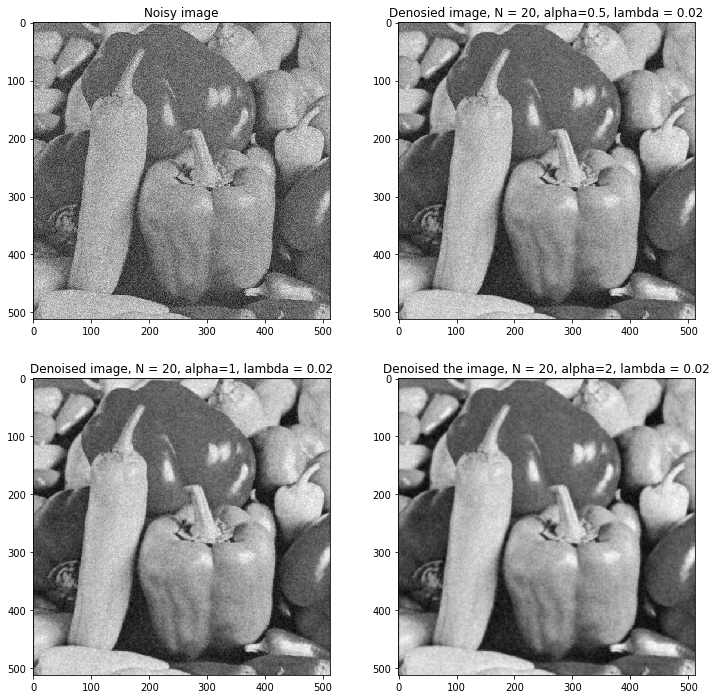

In [22]:
N = 20
lambda_ = 0.02
u3_01 = denoisingHeatDiffusion(u_noisy,N,0.5,lambda_)
u3_1 = denoisingHeatDiffusion(u_noisy,N,1,lambda_)
u3_2 = denoisingHeatDiffusion(u_noisy,N,2,lambda_)
# plot the orignal image
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(u_noisy, cmap = 'gray')
plt.title("Noisy image")
# plot the diffusion on the image
plt.subplot(222)
plt.imshow(u3_01, cmap = 'gray')
plt.title('Denosied image, N = 20, alpha='+str(0.5)+', lambda = '+str(lambda_));
plt.subplot(223)
plt.imshow(u3_1, cmap = 'gray')
plt.title('Denoised image, N = 20, alpha='+str(1)+', lambda = '+str(lambda_));
plt.subplot(224)
plt.imshow(u3_2, cmap = 'gray')
plt.title('Denoised the image, N = 20, alpha='+str(2)+', lambda = '+str(lambda_));

In [23]:
print("Noisy Image, PSNR = %.4f dB"%sk.measure.compare_psnr(u,u_noisy))
print("Alpha = 0.5, PSNR = %.4f dB"%sk.measure.compare_psnr(u,u3_01))
print("Alpha = 1, PSNR = %.4f dB"%sk.measure.compare_psnr(u,u3_1))
print("Alpha = 2, PSNR = %.4f dB"%sk.measure.compare_psnr(u,u3_2))

Noisy Image, PSNR = 19.9917 dB
Alpha = 0.5, PSNR = 25.9543 dB
Alpha = 1, PSNR = 27.7057 dB
Alpha = 2, PSNR = 28.0160 dB


**Vary the number of the gradient step**

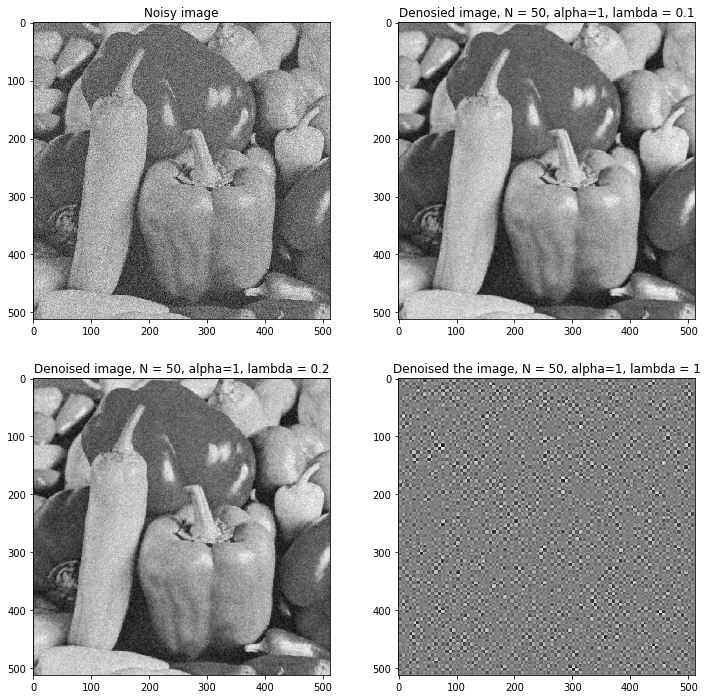

In [24]:
N = 50
alpha = 0.5
u4_01 = denoisingHeatDiffusion(u_noisy,N,alpha,0.1)
u4_02 = denoisingHeatDiffusion(u_noisy,N,alpha,0.2)
u4_1 = denoisingHeatDiffusion(u_noisy,N,alpha,1)
# plot the orignal image
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(u_noisy, cmap = 'gray')
plt.title("Noisy image")
# plot the diffusion on the image
plt.subplot(222)
plt.imshow(u4_01, cmap = 'gray')
plt.title('Denosied image, N = 50, alpha=1'+', lambda = '+str(0.1));
plt.subplot(223)
plt.imshow(u4_02, cmap = 'gray')
plt.title('Denoised image, N = 50, alpha=1'+', lambda = '+str(0.2));
plt.subplot(224)
plt.imshow(u4_1, cmap = 'gray')
plt.title('Denoised the image, N = 50, alpha=1, lambda = '+str(1));

In [25]:
print("Noisy Image, PSNR = %.4f dB"%sk.measure.compare_psnr(u,u_noisy))
print("Lambda = 0.5, PSNR = %.4f dB"%sk.measure.compare_psnr(u,u4_01))
print("Lambda = 1, PSNR = %.4f dB"%sk.measure.compare_psnr(u,u4_02))
print("Lambda = 2, PSNR = %.4f dB"%sk.measure.compare_psnr(u,u4_1))

Noisy Image, PSNR = 19.9917 dB
Lambda = 0.5, PSNR = 26.6401 dB
Lambda = 1, PSNR = 26.5458 dB
Lambda = 2, PSNR = -911.0354 dB


###### Comments :
1. Variation of the number of iterations:
The image is denoised but with an isotropic smoothing effect. When we increase the number of iterations, so the edges of the image is smooth out strongly. It is stablized after a few of iterations.

2. Variation of the weighting factor :
when we increase alpha, the edges are more and more blurred because the regularization term become dominant even with a small number of iterations. 

3. Variation of the gradient step : 
When lambda(gradient step) is too small, it take much time to converge to the global minimum. In the other case, if we set a high gradient step, so the algorithm fails to find the minimum.


# Part III: TV regularization
Derive and implement the diffusion equation associated with the minimization of the regularisation energy $\int_\Omega \sqrt{\epsilon + \|\nabla u(p)\|^2}dp$. We recall that for an energy $\int_\Omega \rho( \|\nabla u(p)\|^2 )dp$ the associated diffusion equation is given by:
$$ \frac{\partial u}{\partial t}= div \left ( \rho'(\|\nabla u(p)\| )  \frac{\nabla u(p)}{\|\nabla u(p)\|} \right )$$
Compare the numerical schemes derived from (i) the discretized version of the analytical expression of the diffusion operator, and (ii) the discretized version of the divergence operator applied to $\rho'(\|\nabla u(p)\| )  \frac{\nabla u(p)}{\|\nabla u(p)\|}$. 

#### The dicretized version of the analytical expression

$$ \frac{\partial u}{\partial t}= \frac{u_{xx}(1+u_{x}^2+u_{y}^2)+(u_{xx}u_{x}+u_{y}u_{yx})u_{x}}{(1+u_{x}^2+u_{y}^2)^\frac{3}{2}} + \frac{u_{yy}(1+u_{x}^2+u_{y}^2)+(u_{yy}u_{y}+u_{x}u_{xy})u_{y}}{(1+u_{x}^2+u_{y}^2)^\frac{3}{2}}$$

where $ u_{x} = \frac{\partial u}{\partial x}; $
       $ u_{xx} = \frac{\partial u_{x}}{\partial x}; $
       $ u_{y} = \frac{\partial u}{\partial y}; $
       $ u_{yy} = \frac{\partial u_{y}}{\partial y}; $
       $ u_{xy} = \frac{\partial u_{x}}{\partial y}; $
       $ u_{yx} = \frac{\partial u_{y}}{\partial x} $

In [26]:
def TV(u, epsilon=0.003):
    
    ux = np.gradient(u)[0]
    uxx = np.gradient(ux)[0]
    uxy = np.gradient(ux)[1]
    
    uy = np.gradient(u)[1]
    uyy = np.gradient(uy)[1]
    uyx = np.gradient(uy)[0]
    
    demonirator = np.power(epsilon+ ux**2 + uy**2, 3/2)
    
    div_x = np.divide(uxx*(epsilon+ ux**2 + uy**2) + (ux*uxx + uy*uyx)*ux,demonirator)
    div_y = np.divide(uyy*(epsilon+ux**2+uy**2)+(ux*uxy+uy*uyy)*uy,demonirator)
    div = div_x + div_y
    
    return div

#### The discretized version of the divergence operator 

In [27]:
def discrete_div(u, epsilon = 0.03) :
    
    pad = u 
    
    grad_x = np.gradient(u)[0]
    grad_y = np.gradient(u)[1]
    

    norm2 = grad_x**2 + grad_y**2

    factor = 1/(np.sqrt(epsilon + norm2))

    a = factor*grad_x
    b = factor*grad_y

    div = np.gradient(a)[0]+ np.gradient(b)[1] 

    return div

In [28]:
def regularization_TV(v,N,epsilon=0.0003,lambda_=0.005,method="analytical"):
    # initialize the image
    uf  = copy.deepcopy(v)
    if method == "analytical":
        for i in range(N):
            uf = uf + lambda_*TV(uf,epsilon)
    else :
        for i in range(N):
            uf = uf + lambda_*discrete_div(uf,epsilon)
    return uf

Run regularization experiments and evaluate the quality of the denoising process w.r.t. the main parameters of the regularization scheme

#### Test the diffusion term derived from the analytical result

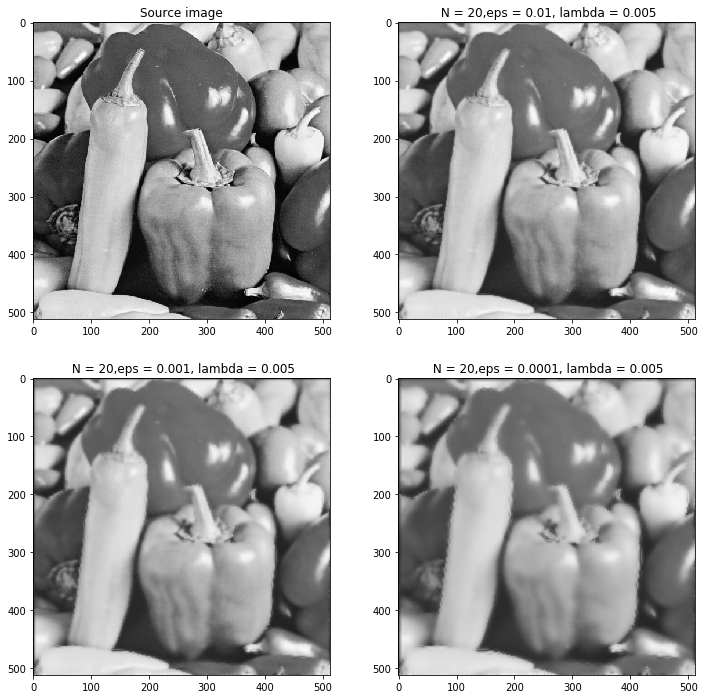

In [29]:
N = 20
u6_1 = regularization_TV(u,N,epsilon=0.01, lambda_ = 0.005)
u6_2 = regularization_TV(u,N,epsilon=0.001, lambda_ = 0.005)
u6_3 = regularization_TV(u,N,epsilon=0.0001, lambda_ = 0.005)
# plot the orignal image
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(u, cmap = 'gray')
plt.title("Source image")
plt.subplot(222)
plt.imshow(u6_1, cmap = 'gray')
plt.title(' N = 20,eps = 0.01, lambda = 0.005');
plt.subplot(223)
plt.imshow(u6_2, cmap = 'gray')
plt.title(' N = 20,eps = 0.001, lambda = 0.005');
plt.subplot(224)
plt.imshow(u6_3, cmap = 'gray')
plt.title(' N = 20,eps = 0.0001, lambda = 0.005');

#### Test the diffusion term derived from the divergence operator

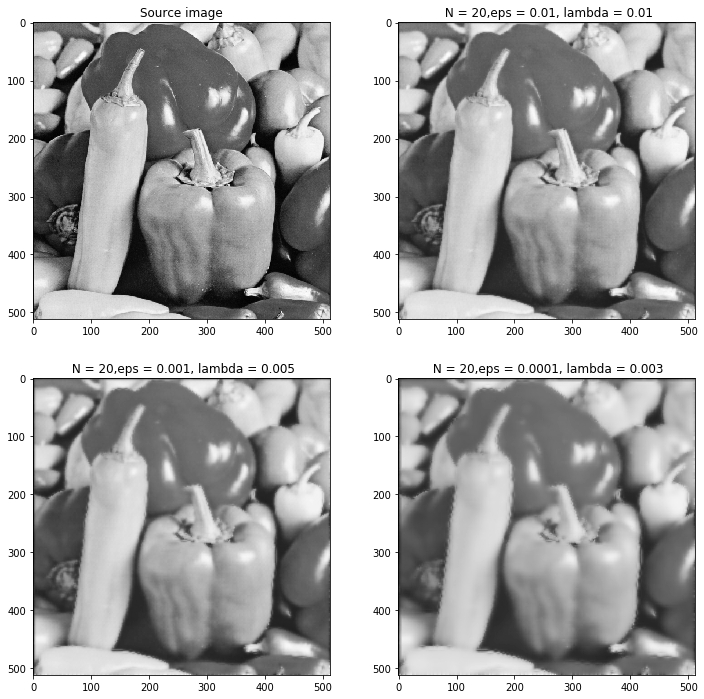

In [30]:
N = 20
u7_1 = regularization_TV(u,N,epsilon=0.01, lambda_ = 0.01, method ='div')
u7_2 = regularization_TV(u,N,epsilon=0.001, lambda_ = 0.005, method ='div')
u7_3 = regularization_TV(u,N,epsilon=0.0001, lambda_ = 0.003, method ='div')
# plot the orignal image
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(u, cmap = 'gray')
plt.title("Source image")
plt.subplot(222)
plt.imshow(u6_1, cmap = 'gray')
plt.title(' N = 20,eps = 0.01, lambda = 0.01');
plt.subplot(223)
plt.imshow(u6_2, cmap = 'gray')
plt.title(' N = 20,eps = 0.001, lambda = 0.005');
plt.subplot(224)
plt.imshow(u6_3, cmap = 'gray')
plt.title(' N = 20,eps = 0.0001, lambda = 0.003');

##### Conclusions :
- With the same number of iteration, and the same gradient step, the lower value of the epsilon, the higher intensity of the diffusion term happens.
- To achieve a good denoised image, we need to balance the value of the epsilon and the lambda. Both parameters are changed in the same direction.
- The suitable value of the lambda should be in order of the average of image gradient's norm.

# Part IV: TV denoising
Implement and benchmark TV denoising schemes, including a comparison to the Laplacian diffusion process.

In [31]:
def denoising_TV(v,N,epsilon=0.0001,lambda_=0.01, alpha =1,method="analytical"):
   
    # initialize the image
    uf  = copy.deepcopy(v)
    if method == "analytical":
        for i in range(N):
            uf = uf + lambda_*((v-uf) + alpha*TV(uf,epsilon))
    else :
        for i in range(N):
            
            uf = uf + lambda_*((v-uf) + alpha*discrete_div(uf,epsilon))        
    return uf

#### Apply the analytical approach

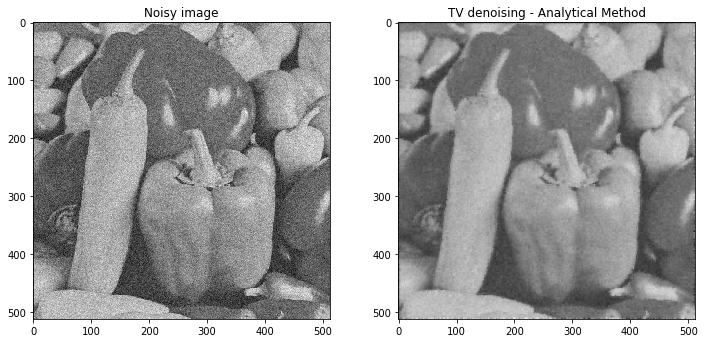

In [32]:
u_denoised_analyt = denoising_TV(u_noisy,20,epsilon=0.001,lambda_=0.01, alpha =0.5,method="analytical")
# plot the orignal image
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(u_noisy, cmap = 'gray')
plt.title("Noisy image")
plt.subplot(222)
plt.imshow(u_denoised_analyt, cmap = 'gray')
plt.title("TV denoising - Analytical Method");

In [33]:
print("Analytical approach PSNR = %.4f dB"%sk.measure.compare_psnr(u,u_denoised_analyt))

Analytical approach PSNR = 26.1579 dB


#### Apply the divergence opperator

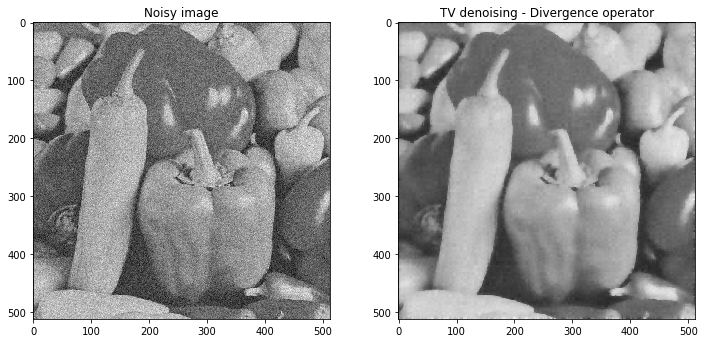

In [34]:
u_denoised_div = denoising_TV(u_noisy,15,epsilon=0.0008,lambda_=0.01, alpha =2,method="div")
# plot the orignal image
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(u_noisy, cmap = 'gray')
plt.title("Noisy image")
plt.subplot(222)
plt.imshow(u_denoised_div, cmap = 'gray')
plt.title("TV denoising - Divergence operator");

In [35]:
print("Divergence opperator PSNR = %.4f dB"%sk.measure.compare_psnr(u,u_denoised_div))

Divergence opperator PSNR = 27.2778 dB


#### Laplacian diffusion process

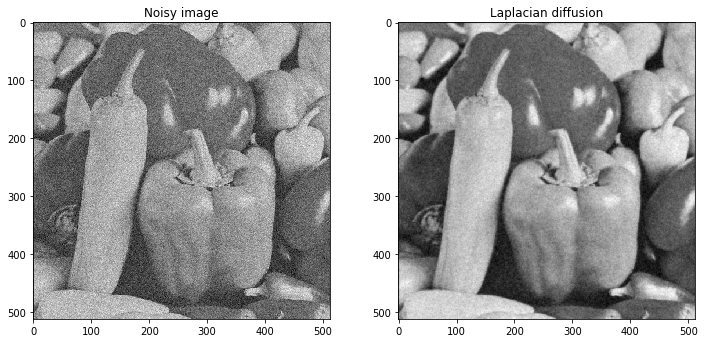

In [36]:
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(u_noisy, cmap = 'gray')
plt.title("Noisy image")
plt.subplot(222)
plt.imshow(u2_100, cmap = 'gray')
plt.title("Laplacian diffusion");

In [37]:
print("Laplacian diffusion PSNR = %.4f dB"%sk.measure.compare_psnr(u,u2_100))

Laplacian diffusion PSNR = 27.7858 dB


**Conclusions:**
- Need to fine tune parameters's suitable values for two approaches
- Denoising by the TV method (two diffrent approaches) give almost the same PSNR criteria as the Laplacian diffusion process. 

# Part V: Perona-Malik diffusion (Bonus)
Implement and benchmark diffusion schemes defined as:
$$ \frac{\partial u}{\partial t}= div \left ( c(\|\nabla u(p)\| )  \nabla u(p) \right )$$
with different choices for function $c()$: $c(x)=1-exp(-x^2/K^2)$, $c(x)=\left [1+x^2/K^2\right]^{-1/2}$, $c(x)=\left [1+x^2/K^2\right]^{-1}$.

In [38]:
def div_Malik(u,method, K=20) :   
    
    grad_x = np.gradient(u)[0] 
    grad_y = np.gradient(u)[1] 
    
    norm2 = grad_x**2 + grad_y**2
    
    if method == "1":
        factor = np.exp(-norm2/K**2)
    elif method == "2":
        factor = 1/np.sqrt(1+norm2/K**2)
    else :
        factor = 1/(1+norm2/K**2)
        
    a = factor*grad_x
    b = factor*grad_y
    
  
    div = np.gradient(a)[0]+ np.gradient(b)[1] 
    return div

def denosing_Malik(v,N,lambda_,K = 20,method = '1'):
    # initialize uf
    uf = copy.deepcopy(v)
    
    for i in range(N):
        uf = uf + lambda_ *div_Malik(uf,method,K)
    return uf

**Test the edge stopping function:** $$c(x)=exp(-x^2/K^2)$$

The stopping function c1: PSNR = 27.4172 dB


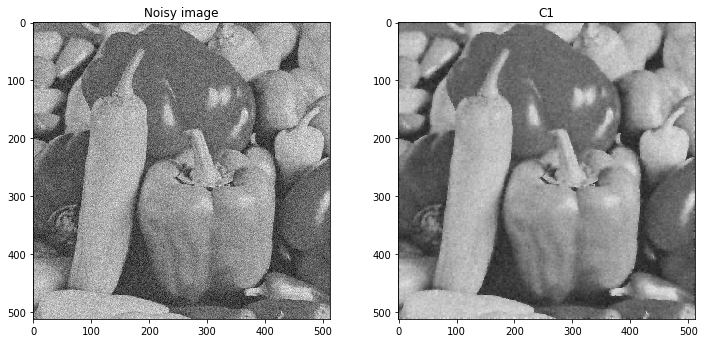

In [39]:
u_denoised_c1 = denosing_Malik(u_noisy, 50, lambda_ = 0.05,K = 0.2, method = '1')
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(u_noisy, cmap = 'gray')
plt.title("Noisy image")
plt.subplot(222)
plt.imshow(u_denoised_c1, cmap = 'gray')
plt.title('C1');
print("The stopping function c1: PSNR = %.4f dB"%sk.measure.compare_psnr(u,u_denoised_c1))

**Test the edge stopping function:** $$c(x)=\left [1+x^2/K^2\right]^{-1/2}$$

The stopping function c2: PSNR = 27.0744 dB


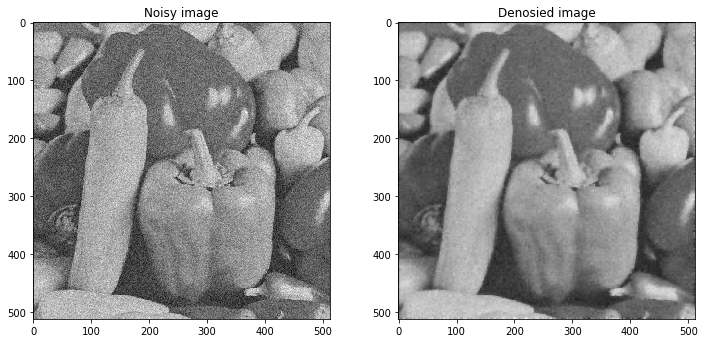

In [40]:
u_denoised_c2 = denosing_Malik(u_noisy, 20, lambda_ = 0.15,K = 0.1, method = '2')
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(u_noisy, cmap = 'gray')
plt.title("Noisy image")
plt.subplot(222)
plt.imshow(u_denoised_c2, cmap = 'gray')
plt.title('Denosied image');
print("The stopping function c2: PSNR = %.4f dB"%sk.measure.compare_psnr(u,u_denoised_c2))

**Test the edge stopping function:** $$c(x)=\left [1+x^2/K^2\right]^{-1}$$

The stopping function c3: PSNR = 27.1914 dB


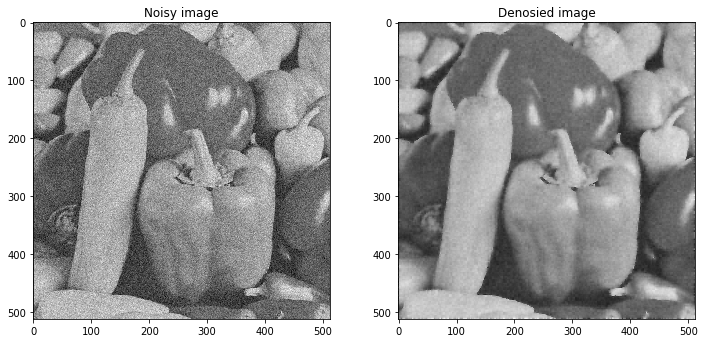

In [41]:
u_denoised_c3 = denosing_Malik(u_noisy, 50, lambda_ = 0.07,K = 0.2, method = '1')
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(u_noisy, cmap = 'gray')
plt.title("Noisy image")
plt.subplot(222)
plt.imshow(u_denoised_c3, cmap = 'gray')
plt.title('Denosied image');
print("The stopping function c3: PSNR = %.4f dB"%sk.measure.compare_psnr(u,u_denoised_c3))

##### Conclusions :
- By using the diffrent edge stopping functions, which get higher value near to 1 within the uniform, innner regions and get lower value near to 0 within edge's region. It means the diffusion is high within the uniform and innner region, and is totally zero across boundaries. So we can denoise the image and avoid smoothing out edges.
- Need to fin-tune the K threshold gradient parameter suitable for each edge stopping function.
- Remark: error in the first edge stopping function definition.

# Part VI: MRF-based image denoising
This section aims to implement and test Markov Random Field (MRF) algorithms for image denoising. Based on discretized version of variational energy:
$$ \int_\Omega \| u(p)-v(p)\|^2dp+\alpha \int_\Omega \|\nabla u(p)\|^2dp$$,
derive the observation lieklihood model $P(V|U)$ and the Markovian prior $P(U)$ of the associated MRF formulation. 
Derive an iterative denoising algorithm based on the maximization of the following posterior likelihood: $$P(U_p|V,U_q, \ q \neq p )$$
Implement this algorithm and compare to the Laplacian diffusion process.

**Test the case:** $\rho (x) =  \sqrt{\epsilon + x^{2}}$

In [65]:
def gradient_method(v,N=500,lambda_=1,epsilon=0.5,alpha=0.1):
    u = copy.deepcopy(v)
    u_shifted1 = np.roll(copy.deepcopy(u), -1, axis=1)
    u_shifted2 = np.roll(copy.deepcopy(u), 1, axis=1)
    u_shifted3 = np.roll(copy.deepcopy(u), -1, axis=0)
    u_shifted4 = np.roll(copy.deepcopy(u), 1, axis=0)
    for i in range(N):
        g = 2 * (u-v) + lambda_ * ((u-u_shifted1)/np.sqrt(epsilon+(u-u_shifted1)**2) + (u-u_shifted2)/np.sqrt(epsilon+(u-u_shifted2)**2)
                                   +(u-u_shifted3)/np.sqrt(epsilon+(u-u_shifted3)**2) + (u-u_shifted4)/np.sqrt(epsilon+(u-u_shifted4)**2))
        u = u - alpha * g
        u_shifted1 = np.roll(u, -1, axis=1)
        u_shifted2 = np.roll(u, 1, axis=1)
        u_shifted3 = np.roll(u, -1, axis=0)
        u_shifted4 = np.roll(u, 1, axis=0)
    return u

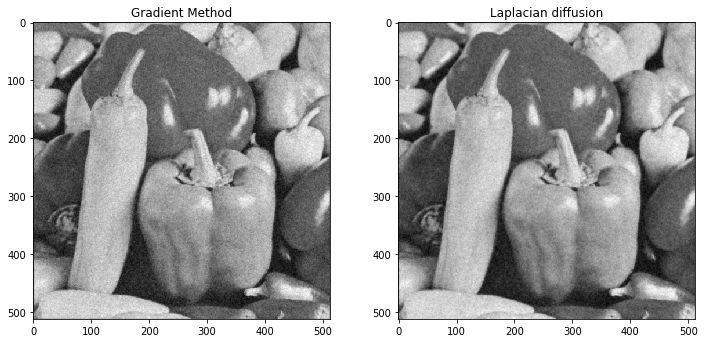

In [67]:
u_ = gradient_method(u_noisy, N=100, lambda_=1,epsilon=0.5,alpha=0.1)
# plot the orignal image
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(u_, cmap = 'gray')
plt.title('Gradient Method');
plt.subplot(222)
plt.imshow(u2_100, cmap = 'gray')
plt.title("Laplacian diffusion");

**System of linear equations for**:  $\rho (x) = x^{2}$

$
I_{0} = \begin{bmatrix} 
1 & 0   & ... & 0 \\
0 & 1   & ... & 0\\
0 & 0 & ... & 0\\
0 & 0   & ... & 1 \\
\end{bmatrix}
$
$
I_{1} = \begin{bmatrix} 
0 & 1   & ... & 0 \\
0 & 0   & ... & 0\\
0 & 0 & ... & 1\\
0 & 0   & ... & 0 \\
\end{bmatrix}
$
$
I_{2} = \begin{bmatrix} 
0 & 0   & ... & 0 \\
1 & 0   & ... & 0\\
0 & 1 & ... & 0\\
0 & 0   & ... & 0 \\
\end{bmatrix}
\quad
$

We resolved the linear system of equations: $$((2\lambda+1)I_{0} - \lambda(I_{1}+I_{2}))U -\lambda U(I_{1}+I_{2}) = V$$ 
Where U is a denoised image which we need to search, and V is a noisy image. We resolved this sylvester equation by applying the the Bartels- Stewart algorithm.

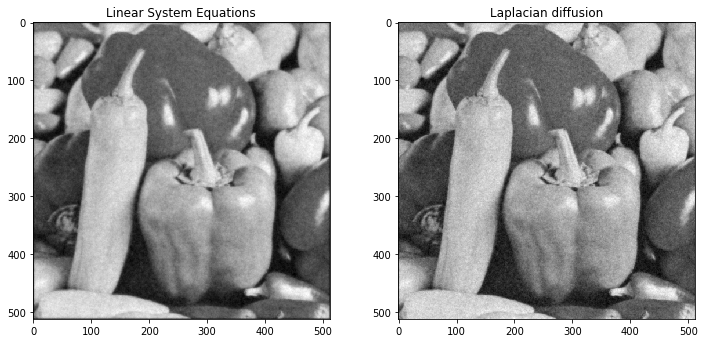

In [63]:
lambda_ = 0.4
I0 = np.identity(u_noisy.shape[0])

I1 = np.diag(np.ones((u_noisy.shape[0]-1)),k=1)
I2 = np.diag(np.ones((u_noisy.shape[0]-1)),k=-1)

M1 = I0*(2*lambda_ +1) - lambda_ *( I1 + I2) 
M2 = -lambda_ * (I1 + I2)
U_denoised = solve_sylvester(M1,M2,u_noisy)

plt.figure(figsize=(12,12))
# plot the diffusion on the image
plt.subplot(221)
plt.imshow(U_denoised, cmap = 'gray')
plt.title('Linear System Equations');
plt.subplot(222)
plt.imshow(u2_100, cmap = 'gray')
plt.title("Laplacian diffusion");

Bonus: Using a m-estimator instead of the quadratic prior (cf. https://hal.inria.fr/inria-00350297/document) and an reweigthed iterative least-square algorithm, implement a generalization of the above MRF formulation which accounts for a more appropriate prior than a Gaussian prior.